In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
vegetables = [
    "cucumber", "tomato", "lettuce", "asparagus",
    "potato", "wheat", "barley"]
farmers = [
    "Farmer Joe", "Upland Bros.", "Smith Gardening",
    "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

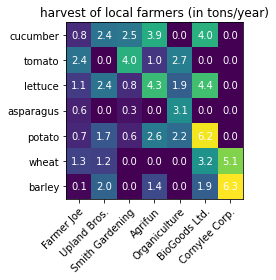

In [3]:
fig, ax = plt.subplots()

im = ax.imshow(harvest)

# show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(farmers)), labels=farmers)
ax.set_yticks(np.arange(len(vegetables)), labels=vegetables)

# rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# loop over data dimensions and create text annotations
for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j], ha="center", va="center", color="w")

ax.set_title("harvest of local farmers (in tons/year)")
fig.tight_layout()
plt.show()

In [4]:
def heatmap(data, row_labels, col_labels, ax=None, cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    
    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one. Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`. Optional.
    cbarlabel
        The label for the colorbar. Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """
    
    if not ax:
        ax = plt.gca()
    
    # plot the heatmap
    im = ax.imshow(data, **kwargs)
    
    # create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
    
    # show all ticks and label them with the respective list entries
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    
    # let the horizontal axes labeling appear on top
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    
    # rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right", rotation_mode="anchor")
    
    # turn spines off and create white grid
    ax.spines[:].set_visible(False)
    
    ax.set_yticks(np.arange(data.shape[0] + 1) - 0.5, minor=True)
    ax.set_xticks(np.arange(data.shape[1] + 1) - 0.5, minor=True)
    ax.grid(which="minor", color="w", linestyle="-", linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    return im, cbar

In [5]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}", textcolors=("black", "white"), threshold=None, **textkw):
    """
    A function to annotate a heatmap.
    
    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **textkw
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """
    
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    
    # normalize the threshold to the images color range
    if threshold:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.0
    
    # set default alignment to center, but allow it to be overwritten by textkw
    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)
    
    # get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)
    
    # loop over the data and create a `Text` for each "pixel"
    # change the text's color depending on the data
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)
    
    return texts

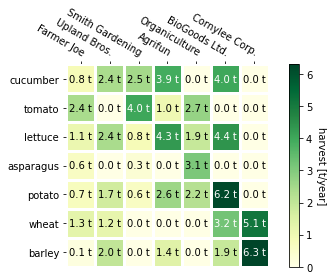

In [6]:
fig, ax = plt.subplots()

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax, cmap="YlGn", cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

In [7]:
np.random.seed(19875001)

In [8]:
# create some new data
data_1 = np.random.randint(2, 100, size=(7, 7))
y_1 = [f"book {i}" for i in range(1, 8)]
x_1 = [f"store {i}" for i in list("ABCDEFG")]

data_2 = np.random.randn(6, 6)
y_2 = [f"prod {i}" for i in range(10, 70, 10)]
x_2 = [f"cycle {i}" for i in range(1, 7)]

In [9]:
qrates = list("ABCDEFG")
norm = matplotlib.colors.BoundaryNorm(np.linspace(-3.5, 3.5, 8), 7)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: qrates[::-1][norm(x)])

In [10]:
corr_matrix = np.corrcoef(harvest)

In [11]:
def func(x, pos):
    return "{:.2f}".format(x).replace("0.", ".").replace("1.00", "")

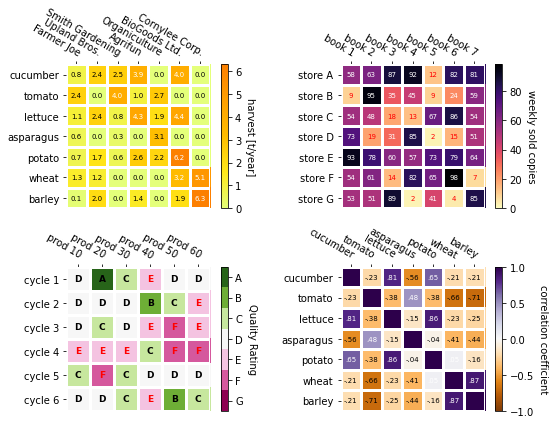

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# replicate the previous example with a different font size and colormap
im, _ = heatmap(harvest, vegetables, farmers, ax=ax1, cmap="Wistia", cbarlabel="harvest [t/year]")
annotate_heatmap(im, valfmt="{x:.1f}", size=7)

# give further arguments to imshow (vmin),
# use an integer format on the annotations and provide some colors
im, _ = heatmap(data_1, x_1, y_1, ax=ax2, vmin=0, cmap="magma_r", cbarlabel="weekly sold copies")
annotate_heatmap(im, valfmt="{x:d}", size=7, threshold=20, textcolors=("red", "white"))

# Sometimes even the data itself is categorical. Here we use a
# `matplotlib.colors.BoundaryNorm` to get the data into classes
# and use this to colorize the plot, but also to obtain the class
# labels from an array of classes
im, _ = heatmap(
    data_2, x_2, y_2, ax=ax3, cmap=plt.get_cmap("PiYG", 7),
    norm=norm, cbar_kw=dict(ticks=np.arange(-3, 4), format=fmt),
    cbarlabel="Quality Rating",
)
annotate_heatmap(im, valfmt=fmt, size=9, fontweight="bold", threshold=-1, textcolors=("red", "black"))

# We can nicely plot a correlation matrix. Since this is bound by -1 and 1,
# we use those as vmin and vmax. We may also remove leading zeros and hide
# the diagonal elements (which are all 1) by using a
# `matplotlib.ticker.FuncFormatter`
im, _ = heatmap(
    corr_matrix, vegetables, vegetables, ax=ax4, cmap="PuOr",
    vmin=-1, vmax=1, cbarlabel="correlation coefficient",
)
annotate_heatmap(im, valfmt=matplotlib.ticker.FuncFormatter(func), size=7)

plt.tight_layout()
plt.show()